# WeatherPy
----

### Analysis
* Temperatures are higher nearest to the equator. Cities slightly north are hotter based on when I pulled this data
* Humidity is not as stronga correlation, however, the majority of cities close to the equator are above 60%.
* Cloudiness has almost no correlation at all. 
* Windspeed is relatively low with a slight uptick around -40 and 40 Lat. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key

In [4]:
# Create empty lists that will be used later for graph creation
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Sets initial counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop
for city in cities:  
    
    # Try statement to append calls
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("Missing field/result... skipping.")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Lompoc
Processing Record 2 | Hit
Missing field/result... skipping.
Processing Record 3 | Vestmanna
Processing Record 4 | Katsuura
Processing Record 5 | Hermanus
Processing Record 6 | Bow Island
Processing Record 7 | Kaitangata
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 8 | Ambilobe
Processing Record 9 | Ouagadougou
Processing Record 10 | Shahr-e Babak
Processing Record 11 | Upernavik
Processing Record 12 | Khatanga
Processing Record 13 | Ferrol
Processing Record 14 | Sao Jose do Belmonte
Processing Record 15 | Sur
Missing field/result... skipping.
Processing Record 16 | Douglas
Processing Record 17 | Vaini
Processing Record 18 | New Norfolk
Processing Record 19 | Qaanaaq
Processing Record 20 | Kapaa
Processing Record 21 | Otake
Processing Record 22 | Hobart
Missing field/result... skipping.
Processing Record 23 | Rikitea
Processing Record 24 | Jamestown
Processing R

Processing Record 223 | Cherskiy
Processing Record 224 | Vila Velha
Processing Record 225 | Tripoli
Missing field/result... skipping.
Processing Record 226 | Puerto del Rosario
Processing Record 227 | Bezhta
Processing Record 228 | Porto Walter
Processing Record 229 | Bandarbeyla
Processing Record 230 | Bethel
Processing Record 231 | Tautira
Processing Record 232 | Sao Filipe
Processing Record 233 | Melfi
Missing field/result... skipping.
Processing Record 234 | Northam
Processing Record 235 | Bafq
Processing Record 236 | Ixtapa
Processing Record 237 | Lagoa
Processing Record 238 | Angoche
Processing Record 239 | Kalmunai
Processing Record 240 | Kahului
Processing Record 241 | Saldanha
Processing Record 242 | Cascas
Processing Record 243 | Makat
Processing Record 244 | Guiberoua
Processing Record 245 | Aklavik
Processing Record 246 | Kevsala
Processing Record 247 | Richards Bay
Processing Record 248 | Mezen
Processing Record 249 | Tuatapere
Processing Record 250 | Dera Bugti
Processing

Processing Record 446 | Panlaitan
Processing Record 447 | Soledar
Processing Record 448 | Kirkwall
Processing Record 449 | Mareeba
Processing Record 450 | Jalu
Processing Record 451 | Dickinson
Processing Record 452 | Flinders
Processing Record 453 | Sombrerete
Processing Record 454 | Atambua
Processing Record 455 | Vilyuysk
Processing Record 456 | Anori
Processing Record 457 | Port Hardy
Missing field/result... skipping.
Processing Record 458 | Kulu
Processing Record 459 | San Ignacio
Processing Record 460 | Port Blair
Processing Record 461 | Ust-Uda
Processing Record 462 | Koidu
Processing Record 463 | Ucluelet
Processing Record 464 | Coffs Harbour
Processing Record 465 | Hamilton
Processing Record 466 | Graciano Sanchez
Missing field/result... skipping.
Processing Record 467 | Kutum
Processing Record 468 | Kuandian
Processing Record 469 | Bathsheba
Processing Record 470 | Betsiamites
Missing field/result... skipping.
Processing Record 471 | Nome
Processing Record 472 | Oshkosh
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creates the dictionary "template" andfills with values taken from city data
columns = {"City": city_name,
                "Cloudiness":cloudiness, 
                "Country":country,
                "Date":date, 
                "Humidity": humidity,
                "Lat":lat, 
                "Lng":lng, 
                "Max Temp": max_temp,
                "Wind Speed":wind_speed
               }

# Creates the dataframe and counts the values in each column
wdata = pd.DataFrame(columns)
wdata.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [7]:
# Saving to a CSV file and shows the first 10 values for comparison
wdata.to_csv('weatherdf.csv')
wdata.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lompoc,40,US,1539315300,77,34.64,-120.46,62.96,4.70
1,Hit,64,IQ,1539317887,39,33.64,42.83,74.03,11.65
2,Vestmanna,36,FO,1539316200,93,62.16,-7.17,48.20,9.17
3,Katsuura,75,JP,1539316800,48,33.93,134.50,64.40,3.36
4,Hermanus,44,ZA,1539317887,90,-34.42,19.24,51.98,6.29
5,Bow Island,1,CA,1539316800,74,49.87,-111.38,35.60,9.17
6,Kaitangata,92,NZ,1539317888,68,-46.28,169.85,43.38,21.83
7,Ambilobe,0,MG,1539317889,67,-13.19,49.05,73.53,15.12
8,Ouagadougou,0,BF,1539313200,78,12.37,-1.53,78.80,6.93
9,Shahr-e Babak,0,IR,1539317889,56,30.12,55.12,46.85,3.71


In [8]:
#Formats the current time for graph titles
time.strftime("%Y-%m-%d")

'2018-10-12'

In [9]:
datetime.fromtimestamp(1539143760)

datetime.datetime(2018, 10, 9, 23, 56)

### Plotting the Data
*Prints Plots and saves the images in Image folder

#### Latitude vs. Temperature Plot

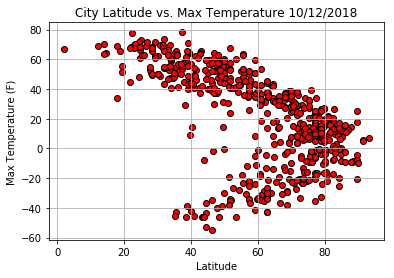

In [10]:
x_axis = wdata['Lat']
y_axis = wdata['Max Temp']


plt.scatter(y_axis, x_axis, c='red', edgecolors='black', alpha=1)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.grid(True)

plt.savefig("Images/LatitudeVsMaxTemperature.png")


#### Latitude vs. Humidity Plot

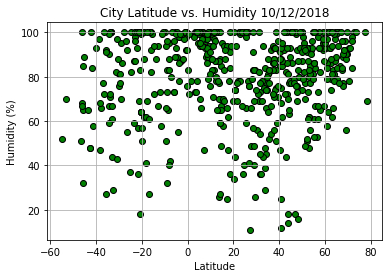

In [11]:
x_axis = wdata['Lat']
y_axis = wdata['Humidity']

plt.scatter(x_axis, y_axis, c='green', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

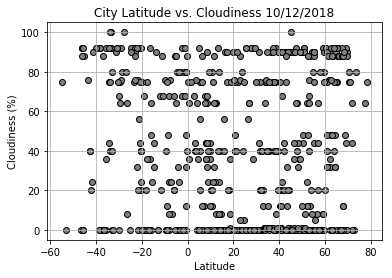

In [12]:
x_axis = wdata['Lat']
y_axis = wdata['Cloudiness']

plt.scatter(x_axis, y_axis, c='grey', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

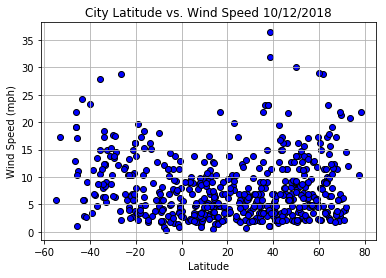

In [13]:
x_axis = wdata['Lat']
y_axis = wdata['Wind Speed']

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/Latitude vs WindSpeed.png")
plt.show()